# 2021 Abu Dhabi Grand Prix

The 2021 Abu Dhabi Grand Prix took place at the Yas Marina Circuit in Abu Dhabi on 12th December 2021. Max Verstappen from Red Bull won the race. He was followed by Mercedes's Lewis Hamilton in the 2nd position and Ferrari's Carlos Sainz Jr. in the third

### The Fast-F1 library
The Fast-F1 library is an open-source python package for accessing F1 historical timing data and telemetry. FastF1 is built on top of Pandas DataFrames and Series. However, it provides some convenient methods specially tailored for F1 data.

#### Importing necessary libraries and modules

In [1]:
pip install fastf1


Note: you may need to restart the kernel to use updated packages.  Downloading url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)

  Attempting uninstall: attrs
    Found existing installation: attrs 20.3.0
    Uninstalling attrs-20.3.0:
      Successfully uninstalled attrs-20.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta


In [7]:
import warnings
warnings.filterwarnings('ignore')

#### Creating a Cache folder

In [8]:
ff1.Cache.enable_cache('Desktop/cache')


#### 1.Qualifying results overview
First, let's load the Qualifying session data that is abbreviated as Q. We'll then plot the qualifying results and visualize the fastest lap time.

In [9]:
abu_dhabi_qualification = ff1.get_session(2021, 'Abu Dhabi', 'Q')
print(abu_dhabi_qualification.date)

2021-12-11 00:00:00


We already knew the date of the qualifying session, but this is a good sanity check. Let's now output the result of the qualifying session.

In [10]:
abu_dhabi_qualification.load();
abu_dhabi_qualification.results[:3]

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.2.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching t

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,Red Bull Racing,0600EF,Max,Verstappen,Max Verstappen,1.0,0.0,0 days 00:01:23.322000,0 days 00:01:22.800000,0 days 00:01:22.109000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,00D2BE,Lewis,Hamilton,Lewis Hamilton,2.0,0.0,0 days 00:01:22.845000,0 days 00:01:23.145000,0 days 00:01:22.480000,NaT,,0.0
4,4,L NORRIS,NOR,McLaren,FF9800,Lando,Norris,Lando Norris,3.0,0.0,0 days 00:01:23.553000,0 days 00:01:23.256000,0 days 00:01:22.931000,NaT,,0.0


We see that Verstappen won the qualifying session. The result is a pandas dataframe, and you can further analyze it to gain valuable insights.

#### Fastest lap timing

In [12]:
abu_dhabi_qualification.load()
drivers = pd.unique(abu_dhabi_qualification.laps['Driver'])
print(drivers)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '4', '11', '55', '77', '16', '22', '31', '3', '14', '10', '18', '99', '5', '6', '63', '7', '47', '9']


['VER' 'HAM' 'NOR' 'PER' 'SAI' 'BOT' 'LEC' 'TSU' 'OCO' 'RIC' 'ALO' 'GAS'
 'STR' 'GIO' 'VET' 'LAT' 'RUS' 'RAI' 'MSC' 'MAZ']


After that we’ll get each drivers fastest lap, create a new laps object from these laps, sort them by lap time and have pandas reindex them to number them nicely by starting position.

In [13]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = abu_dhabi_qualification.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

The plot is nicer to look at and more easily understandable if we just plot the time differences. Therefore we subtract the fastest lap time from all other lap times.

In [14]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

We can take a quick look at the laps we have to check if everything looks all right. For this, we’ll just check the ‘Driver’, ‘LapTime’ and ‘LapTimeDelta’ columns.

In [15]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:22.109000        0 days 00:00:00
1     HAM 0 days 00:01:22.480000 0 days 00:00:00.371000
2     NOR 0 days 00:01:22.931000 0 days 00:00:00.822000
3     PER 0 days 00:01:22.947000 0 days 00:00:00.838000
4     SAI 0 days 00:01:22.992000 0 days 00:00:00.883000
5     BOT 0 days 00:01:23.036000 0 days 00:00:00.927000
6     LEC 0 days 00:01:23.122000 0 days 00:00:01.013000
7     TSU 0 days 00:01:23.220000 0 days 00:00:01.111000
8     OCO 0 days 00:01:23.389000 0 days 00:00:01.280000
9     RIC 0 days 00:01:23.409000 0 days 00:00:01.300000
10    ALO 0 days 00:01:23.460000 0 days 00:00:01.351000
11    GAS 0 days 00:01:24.043000 0 days 00:00:01.934000
12    STR 0 days 00:01:24.066000 0 days 00:00:01.957000
13    GIO 0 days 00:01:24.251000 0 days 00:00:02.142000
14    VET 0 days 00:01:24.305000 0 days 00:00:02.196000
15    LAT 0 days 00:01:24.338000 0 days 00:00:02.229000
16    RUS 0 days 00:01:24.423000 0 days 00:00:02

Finally, we’ll create a list of team colors per lap to color our plot.

In [17]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps

In [18]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

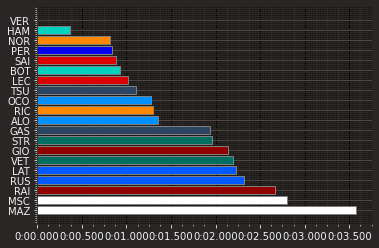

In [19]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

Finally, give the plot a meaningful title

In [23]:
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{abu_dhabi_qualification.event['EventName']} {abu_dhabi_qualification.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

<Figure size 432x288 with 0 Axes>

#### 2.Final Race

Let's now focus on the main race and explore other details associated with it. The process is similar to how we loaded the data for the Qualifying session data except that we replace the word Q with R.

In [24]:
abu_dhabi_race = ff1.get_session(2021, 'Abu Dhabi', 'R')
print(abu_dhabi_race .date)

2021-12-12 00:00:00


#### Laps

Looking at the individual laps will give more insight into the race. We can then filter and focus on a specific lap as per our analysis criterion.

In [25]:
abu_dhabi_race.load();
laps_r = abu_dhabi_race.laps
laps_r

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track s

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.885000,33,NaT,1,1,0 days 00:23:01.492000,NaT,NaT,0 days 00:00:38.428000,0 days 00:00:33.563000,...,False,SOFT,4.0,False,0 days 01:02:21.871000,Red Bull Racing,VER,1,False,2021-12-12 13:03:21.881
1,0 days 01:05:23.988000,33,0 days 00:01:29.103000,2,1,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,0 days 00:00:32.961000,...,False,SOFT,5.0,False,0 days 01:03:54.885000,Red Bull Racing,VER,1,True,2021-12-12 13:04:54.895
2,0 days 01:06:52.815000,33,0 days 00:01:28.827000,3,1,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,0 days 00:00:32.785000,...,False,SOFT,6.0,False,0 days 01:05:23.988000,Red Bull Racing,VER,1,True,2021-12-12 13:06:23.998
3,0 days 01:08:21.841000,33,0 days 00:01:29.026000,4,1,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,0 days 00:00:32.882000,...,False,SOFT,7.0,False,0 days 01:06:52.815000,Red Bull Racing,VER,1,True,2021-12-12 13:07:52.825
4,0 days 01:09:50.559000,33,0 days 00:01:28.718000,5,1,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,0 days 00:00:32.636000,...,False,SOFT,8.0,False,0 days 01:08:21.841000,Red Bull Racing,VER,1,True,2021-12-12 13:09:21.851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0 days 01:34:31.063000,7,0 days 00:01:33.951000,21,1,NaT,0 days 01:34:29.994000,0 days 00:00:18.565000,0 days 00:00:38.824000,0 days 00:00:36.562000,...,False,MEDIUM,21.0,True,0 days 01:32:57.112000,Alfa Romeo Racing,RAI,1,False,2021-12-12 13:33:57.122
994,0 days 01:36:21.785000,7,0 days 00:01:50.722000,22,2,0 days 01:34:52.414000,NaT,0 days 00:00:38.877000,0 days 00:00:38.618000,0 days 00:00:33.227000,...,False,HARD,1.0,True,0 days 01:34:31.063000,Alfa Romeo Racing,RAI,1,False,2021-12-12 13:35:31.073
995,0 days 01:37:51.483000,7,0 days 00:01:29.698000,23,2,NaT,NaT,0 days 00:00:18.329000,0 days 00:00:38.343000,0 days 00:00:33.026000,...,True,HARD,2.0,True,0 days 01:36:21.785000,Alfa Romeo Racing,RAI,1,True,2021-12-12 13:37:21.795
996,0 days 01:39:22.790000,7,0 days 00:01:31.307000,24,2,NaT,NaT,0 days 00:00:18.432000,0 days 00:00:39.728000,0 days 00:00:33.147000,...,False,HARD,3.0,True,0 days 01:37:51.483000,Alfa Romeo Racing,RAI,1,True,2021-12-12 13:38:51.493


The output is again a pandas' dataframe, and analyzing it should be pretty straightforward. The various columns included in the above dataframe can be accessed as follows:

In [26]:
laps_r.columns


Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

These details should give us sufficient information into the race for instance,

#### Total Number of Laps

In [27]:
laps_r['LapNumber'].max()

58

#### Fastest lap

In [28]:
fastest_lap = laps_r.pick_fastest()
fastest_lap['Driver']

'VER'

Verstappen managed the fastest lap even in the final race.

#### Gear Shifts

In [29]:
lap = abu_dhabi_qualification.laps.pick_fastest()
tel = lap.get_telemetry()

Prepare the data for plotting by converting it to the appropriate numpy data types

In [30]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

Create a line collection. Set a segmented colormap and normalize the plot to full integer values of the colormap

In [31]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

Create the plot

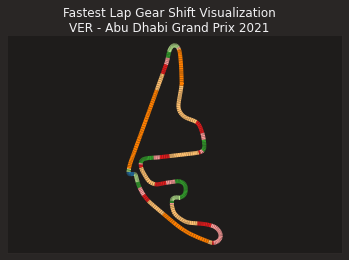

In [35]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {abu_dhabi_qualification.event['EventName']} {abu_dhabi_qualification.event.year}"
)

Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they are centered for each color segment.

In [37]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

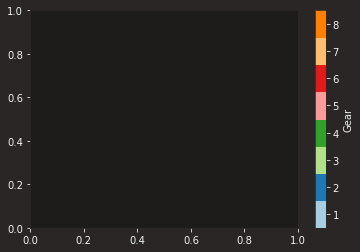

In [38]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


#### Final race results — The podium finishers

In [39]:
abu_dhabi_race.results[:3]


,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
33,33,M VERSTAPPEN,VER,Red Bull Racing,0600EF,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:30:17.345000,Finished,26.0
44,44,L HAMILTON,HAM,Mercedes,00D2BE,Lewis,Hamilton,Lewis Hamilton,2.0,2.0,NaT,NaT,NaT,0 days 01:30:19.601000,Finished,18.0
55,55,C SAINZ,SAI,Ferrari,DC0004,Carlos,Sainz,Carlos Sainz,3.0,5.0,NaT,NaT,NaT,0 days 01:30:22.518000,Finished,15.0


The top three finishers were:
   
   
   Max Verstappen from Red Bull
   
   
   Lewis Hamilton from Mercedes
   
   
   Carlos Sainz from Ferrari


We've seen the overall results and a preliminary overview of the data. Going further, we can visualize some of the interesting findings like individual driver's statistics.

#### Hamilton vs Verstappen

This season witnessed one of the most intense title fights for years. Both Hamilton and Verstappen were running neck and neck in this competition. Let's see how their laps compared against each other. Note how the colors in the chart below align with the driver's team colors.

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7']


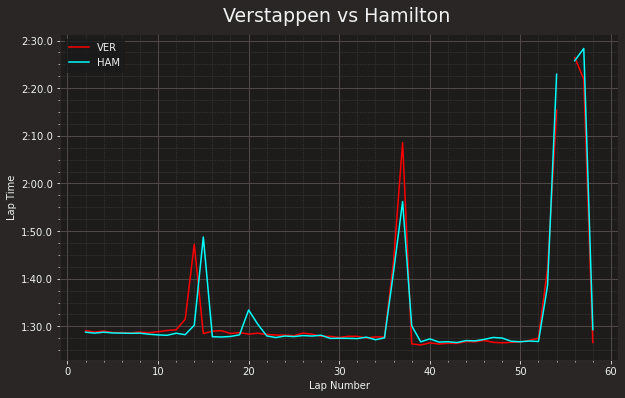

In [41]:
laps = abu_dhabi_race.load_laps(with_telemetry=True)
ver = laps.pick_driver('VER')
ham = laps.pick_driver('HAM')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ver['LapNumber'], ver['LapTime'], color='red')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.set_title("Verstappen vs Hamilton ")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.legend(['VER','HAM'])

#### Comparing Hamilton's & Verstappen's fastest lap

#### Hamilton's fastest lap

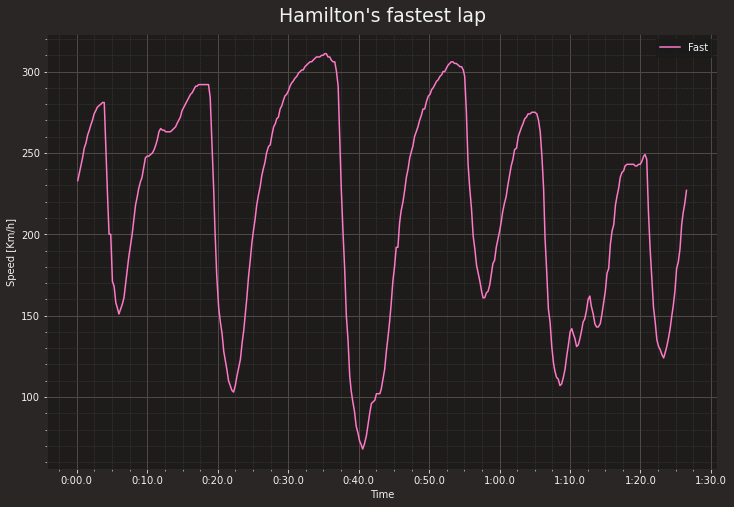

In [42]:
ham_fastest_lap = laps_r.pick_driver('HAM').pick_fastest()
ham_car_data = ham_fastest_lap.get_car_data()
t = ham_car_data['Time']
velocity = ham_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Hamilton's fastest lap")
ax.legend()

#### Verstappen’s fastest lap

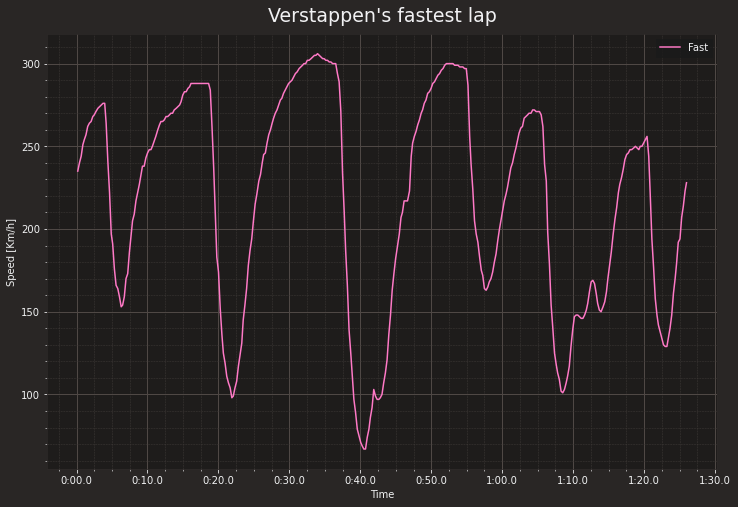

In [43]:
ver_fastest_lap = laps_r.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velocity = ver_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's fastest lap")
ax.legend()

#### Conclusion